# Tanzanian Water Wells - Project Work

# Table of Contents



1.   Importing the relevant Libraries
2.   Setting up Custom Functions
3.   EDA - Overview
4.   EDA - Features
5.   Modelling



# **Importing the relevant libraries**

In [25]:
# Run this cell without changes to import the necessary libraries
import pickle, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from numbers import Number

In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

In [27]:
train_labels = pd.read_csv('/content/Training set lables.csv')
train_values = pd.read_csv('/content/Training Set Values.csv')
test_values = pd.read_csv('/content/Test Set Values.csv')



In [28]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [29]:
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [30]:
test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [31]:
#merge train values and train labels to single dataset
train= pd.merge(train_labels , train_values, on='id')

In [32]:
train.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [33]:
#concatenate train and test for data visualization
raw = pd.concat([train, test_values])
raw.head()


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [34]:
# Keep only columns with no missing values
raw = raw.dropna(axis=1)
raw.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,region,region_code,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,0,Pangani,Manyara,21,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [35]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74250 entries, 0 to 14849
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   gps_height             74250 non-null  int64  
 4   longitude              74250 non-null  float64
 5   latitude               74250 non-null  float64
 6   num_private            74250 non-null  int64  
 7   basin                  74250 non-null  object 
 8   region                 74250 non-null  object 
 9   region_code            74250 non-null  int64  
 10  district_code          74250 non-null  int64  
 11  lga                    74250 non-null  object 
 12  ward                   74250 non-null  object 
 13  population             74250 non-null  int64  
 14  recorded_by            74250 non-null  object 
 15  constru

In [36]:
raw= pd.merge(train_labels ,raw, on='id')

In [37]:
raw.head()

,id,status_group,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,region,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,1399,34.698766,-2.147466,0,Lake Victoria,Mara,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,686,37.460664,-3.821329,0,Pangani,Manyara,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,0,31.130847,-1.825359,0,Lake Victoria,Kagera,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [38]:
raw.tail()

,id,status_group,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,region,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,functional,10.0,2013-05-03,1210,37.169807,-3.253847,0,Pangani,Kilimanjaro,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,1212,35.249991,-9.070629,0,Rufiji,Iringa,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,0,34.017087,-8.750434,0,Rufiji,Mbeya,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,0,35.861315,-6.378573,0,Rufiji,Dodoma,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,functional,0.0,2011-03-23,191,38.104048,-6.747464,0,Wami / Ruvu,Morogoro,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


# **Setting up Custom Functions**

Before embarking on EDA we need to define certain custom functions

In [39]:
#custom function that creates a numerical data quality report
def numerical_dqr(df):

  #select numerical columns
  numerical = df.select_dtypes(include = ['int', 'Int64', 'float']).columns.tolist()

  #data type
  data_types = pd.DataFrame(
    df[numerical].dtypes,
    columns=['Data Type'])

  #missing data
  missing_data = pd.DataFrame(
    df[numerical].isnull().sum(),
    columns=['Missing Values'])

  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[numerical].columns.values):
    unique_values.loc[row] = [df[numerical][row].nunique()]

    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[numerical].columns.values):
      count_values.loc[row] = [df[numerical][row].count()]

    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[numerical].columns.values):
      maximum_values.loc[row] = [df[numerical][row].max()]

  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[numerical].columns.values):
      minimum_values.loc[row] = [df[numerical][row].min()]

  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[numerical].columns.values):
      mean_values.loc[row] = [df[numerical][row].mean()]

  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[numerical].columns.values):
      quartile_1.loc[row] = [df[numerical][row].quantile(0.25)]

  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[numerical].columns.values):
    median.loc[row] = [df[numerical][row].quantile(0.5)]

  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[numerical].columns.values):
    quartile_3.loc[row] = [df[numerical][row].quantile(0.75)]

  #join columns
  dq_report_num = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)

  #percentage missing
  dq_report_num['Missing %'] = (dq_report_num['Missing Values'] / len(df[numerical]) *100)

  # change order of columns
  dq_report_num = dq_report_num[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]

  #round
  dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']] =   dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']].round(1)


  #rreturn report
  return(dq_report_num)

In [40]:
def categorical_dqr(df):

  #select categorical columns
  categorical = df.select_dtypes(include = 'object').columns.tolist()

  #datatype
  data_types = pd.DataFrame(
    df[categorical].dtypes,
    columns=['Data Type'])

  #count
  count_values = pd.DataFrame(
      columns=['Records'])
  for row in list(raw[categorical].columns.values):
    count_values.loc[row] = [raw[categorical][row].count()]

   #missing data
  missing_data = pd.DataFrame(
    df[categorical].isnull().sum(),
    columns=['Missing Values'])

  #unique values
  unique_values = pd.DataFrame(
      columns=['Unique Values'])
  for row in list(raw[categorical].columns.values):
    unique_values.loc[row] = [raw[categorical][row].nunique()]

  #mode
  mode_values = pd.DataFrame(
      columns=['Mode'])
  for row in list(raw[categorical].columns.values):
    mode_values.loc[row] = [raw[categorical][row].mode()[0]]
    mode = mode_values.loc[row]

  #mode frequency
  listModeFreq = []
  for row in categorical:
    mode = raw[row].mode().iat[0]
    ModeFreq = raw[row].value_counts()[mode]
    #print(x, mode, raw[x].value_counts()[mode])
    listModeFreq .append(ModeFreq )
  listModeFreq  = np.array(listModeFreq )


   #create data quality report
  dq_report_cat = data_types.join(missing_data).join(count_values).join(unique_values).join(mode_values)
  dq_report_cat['Mode freq.'] = listModeFreq
  dq_report_cat['Mode %'] = (dq_report_cat['Mode freq.'] / dq_report_cat['Records']*100) .astype('float')
  dq_report_cat['Missing %'] = (dq_report_cat['Missing Values'] / len(raw[categorical]) *100)

  #change order of columns
  dq_report_cat = dq_report_cat[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mode', 'Mode freq.', 'Mode %']]
  dq_report_cat[['Missing %', 'Mode %']] =   dq_report_cat[['Missing %'	,  'Mode %']].round(1  )

  #return report
  return(dq_report_cat)

In [41]:
#custom function that creates a numerical data quality report
def datetime_dqr(df):

  #select numerical columns
  date = df.select_dtypes(include = ['datetime64[ns]']).columns.tolist()

  #data type
  data_types = pd.DataFrame(
    df[date].dtypes,
    columns=['Data Type'])

  #missing data
  missing_data = pd.DataFrame(
    df[date].isnull().sum(),
    columns=['Missing Values'])

  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[date].columns.values):
    unique_values.loc[row] = [df[date][row].nunique()]

    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[date].columns.values):
      count_values.loc[row] = [df[date][row].count()]

    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[date].columns.values):
      maximum_values.loc[row] = [df[date][row].max()]

  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[date].columns.values):
      minimum_values.loc[row] = [df[date][row].min()]

  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[date].columns.values):
      mean_values.loc[row] = [df[date][row].mean()]

  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[date].columns.values):
      quartile_1.loc[row] = [df[date][row].quantile(0.25)]

  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[date].columns.values):
    median.loc[row] = [df[date][row].quantile(0.5)]

  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[date].columns.values):
    quartile_3.loc[row] = [df[date][row].quantile(0.75)]

  #join columns
  dq_report_date = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)

  #percentage missing
  dq_report_date['Missing %'] = (dq_report_date['Missing Values'] / len(df[date]) *100)

  # change order of columns
  dq_report_date = dq_report_date[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]

  #round
  dq_report_date['Mean Value'] = dq_report_date['Mean Value'].dt.date
  dq_report_date['Missing %'] = dq_report_date['Missing %'].round(1)


  #rreturn report
  return(dq_report_date)

In [42]:
#custome duplicate checker
def duplicate_checker(df):
  duplicates = df.duplicated(keep = 'first').sum()
  print("Number of duplicates: {}".format(duplicates))
  print("Total number of records: {}".format(len(df)))
  print("Percentage duplicated: {}".format((duplicates/len(df))*100))

In [43]:
def kdeplotter (dataset, feature, rows, columns):
  fig, axes = plt.subplots(nrows=rows,ncols=columns, figsize = (30,12))
  plot = 0
  for i in range(rows):
    for j in range(columns):
       ax = sns.kdeplot(data = dataset, x =feature[plot] , ax = axes[i][j],    shade = True, color  = "black" )
       plot +=1

In [44]:
def countplotter (dataset, feature, rows, columns):
    fig, axes = plt.subplots(nrows=rows,ncols=columns, figsize = (30,50))
    plot = 0
    for i in range(rows):
        for j in range(columns):
             ax = sns.countplot(data = dataset, x =feature[plot] , ax = axes[i][j], palette='Set2' )
             ax.set_title(feature[plot])
             ax.set_xlabel("")
             ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize=9)
             plot +=1

In [45]:
def distribution_checker (data, xlabel):
  grouped = data.groupby([xlabel, 'status_group'])['id'].count().reset_index()
  pivot = grouped.pivot_table(index = xlabel, columns = 'status_group', fill_value = 0)
  mi=pivot.columns
  mi.tolist()
  ind = pd.Index([ str(e[1])  for e in mi.tolist()])
  pivot.columns = ind
  pivot['nr_pumps'] = pivot['functional'] +pivot['functional needs repair'] +pivot['non functional']
  pivot['all_pumps'] = pivot['nr_pumps'].sum()
  pivot['perc_total_pumps'] =((pivot['nr_pumps']/pivot['all_pumps'])*100).round(1)
  pivot['perc_functional'] = ((pivot['functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_non_functional'] = ((pivot['non functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_functional_needs_repair'] = ((pivot['functional needs repair']/pivot['nr_pumps'])*100).round(1)
  pivot = pivot.drop(['functional', 'functional needs repair', 'non functional', 'all_pumps'], axis=1)
  return(pivot)

# **EDA Overview**

In [46]:
#Let us examin if there are duplicates in the dataset
#Good news! There are no duplicate recoreds in the dataset.
duplicate_checker(raw)

Number of duplicates: 0
Total number of records: 59400
Percentage duplicated: 0.0


Numerical Data Overview

In [47]:
#plot a numerical data quality report
numerical_dqr = numerical_dqr(raw)
numerical_dqr

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
id,int64,59400,59400,0,0.0,37115.1,0.0,18519.8,37061.5,55656.5,74247.0
amount_tsh,float64,59400,98,0,0.0,317.7,0.0,0.0,0.0,20.0,350000.0
gps_height,int64,59400,2428,0,0.0,668.3,-90.0,0.0,369.0,1319.2,2770.0
longitude,float64,59400,57516,0,0.0,34.1,0.0,33.1,34.9,37.2,40.3
latitude,float64,59400,57517,0,0.0,-5.7,-11.6,-8.5,-5.0,-3.3,-0.0
num_private,int64,59400,65,0,0.0,0.5,0.0,0.0,0.0,0.0,1776.0
region_code,int64,59400,27,0,0.0,15.3,1.0,5.0,12.0,17.0,99.0
district_code,int64,59400,20,0,0.0,5.6,0.0,2.0,3.0,5.0,80.0
population,int64,59400,1049,0,0.0,179.9,0.0,0.0,25.0,215.0,30500.0
construction_year,int64,59400,55,0,0.0,1300.7,0.0,0.0,1986.0,2004.0,2013.0


From the above we can already derive the following information:

Some features like region_code and district_code might actually be categorical features.
Amount_tsh and num_private appear to contain a lot of zero's.
Population and gps_height appear to contain some outliers.

In [48]:
#convert faulty datatypes
raw[['region_code','district_code', 'num_private', 'id']] = raw[['region_code','district_code', 'num_private', 'id']].astype('object')

Categorical Data Overview

In [49]:
categorical_dqr = categorical_dqr(raw)
categorical_dqr

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
id,object,59400,59400,0,0.0,0,1,0.0
status_group,object,59400,3,0,0.0,functional,32259,54.3
date_recorded,object,59400,356,0,0.0,2011-03-15,572,1.0
num_private,object,59400,65,0,0.0,0,58643,98.7
basin,object,59400,9,0,0.0,Lake Victoria,10248,17.3
region,object,59400,21,0,0.0,Iringa,5294,8.9
region_code,object,59400,27,0,0.0,11,5300,8.9
district_code,object,59400,20,0,0.0,1,12203,20.5
lga,object,59400,125,0,0.0,Njombe,2503,4.2
ward,object,59400,2092,0,0.0,Igosi,307,0.5


From the following Categorical Data we can derive the following:

1. 54.3% of the pumps are functional.
2. Most of the water is derived from the lake victoria basin
3. The extraction of water is mainly done by gravity
4. The region with the most pumps is iringa  

Therefore this allows us to focus on certain areas in our review of the region

# **EDA - Features**

## **Amount in TSHs**

In [50]:
numerical_dqr.loc[['amount_tsh']]

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
amount_tsh,float64,59400,98,0,0.0,317.7,0.0,0.0,0.0,20.0,350000.0


We can note that the amount in TShs. are mostly 0 we can therefore check the functionality of the pumps around that

In [51]:
#perhaps there is value hidden in the 'missigness' of amount_tsh, let's check this.
temp = train.copy()
temp['amount_tsh_missing'] = np.where( temp['amount_tsh']==0.0, 1, 0) # if amount_tsh =0, then 1, otherwise 0

#visualize the distribution of the y-variable 'status_group'
distribution_checker(temp, 'amount_tsh_missing')

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
amount_tsh_missing,,,,,
0,17761.0,29.9,70.7,22.2,7.1
1,41639.0,70.1,47.3,45.4,7.3


We can therefore note the following:
1. 70% of the pumps have no value, out of which 45% of those pumps are non-functional
2. 30% of the pumps have value, out of which 70% of those pumps are functional

## **Basin**

In [52]:
categorical_dqr.loc[['basin']]

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
basin,object,59400,9,0,0.0,Lake Victoria,10248,17.3


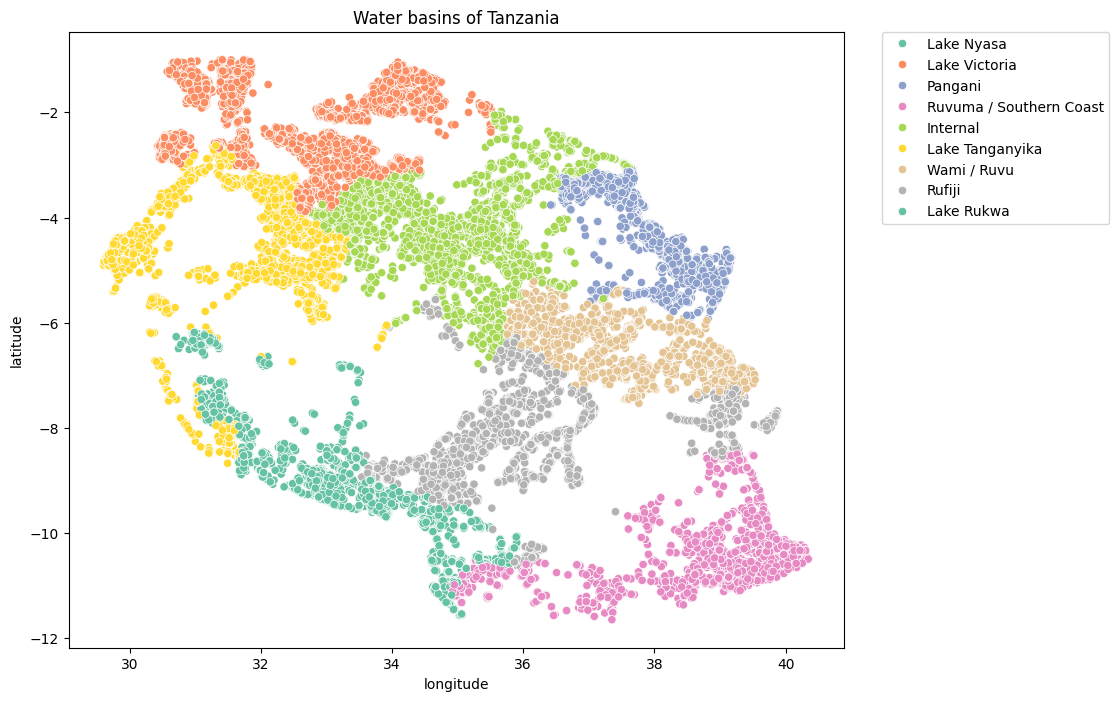

In [53]:
#plot the water basins of Tanzania
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
import seaborn as sns # Import seaborn for enhanced visualizations

fig, axes = plt.subplots(figsize=(10, 8))
temp = raw[raw['longitude'] != 0]  # Only include records where longitude isn't zero
temp['gps_height_zero'] = np.where(temp['gps_height'] == 0, 'yes', 'no')
ax = sns.scatterplot(x=temp['longitude'], y=temp['latitude'], hue=temp['basin'], palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(title='Water basins of Tanzania')
plt.show()

In [54]:
basin = distribution_checker(raw, 'basin')
basin = basin.sort_values('nr_pumps', ascending= False)
basin.head(10)

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
basin,,,,,
Lake Victoria,10248.0,17.3,49.8,40.6,9.7
Pangani,8940.0,15.1,60.1,34.6,5.3
Rufiji,7976.0,13.4,63.5,31.0,5.5
Internal,7785.0,13.1,57.6,35.3,7.2
Lake Tanganyika,6432.0,10.8,48.3,40.2,11.5
Wami / Ruvu,5987.0,10.1,52.4,43.1,4.5
Lake Nyasa,5085.0,8.6,65.4,29.7,4.9
Ruvuma / Southern Coast,4493.0,7.6,37.2,55.6,7.3
Lake Rukwa,2454.0,4.1,40.7,48.2,11.0


Text(0.5, 0, 'Basin')

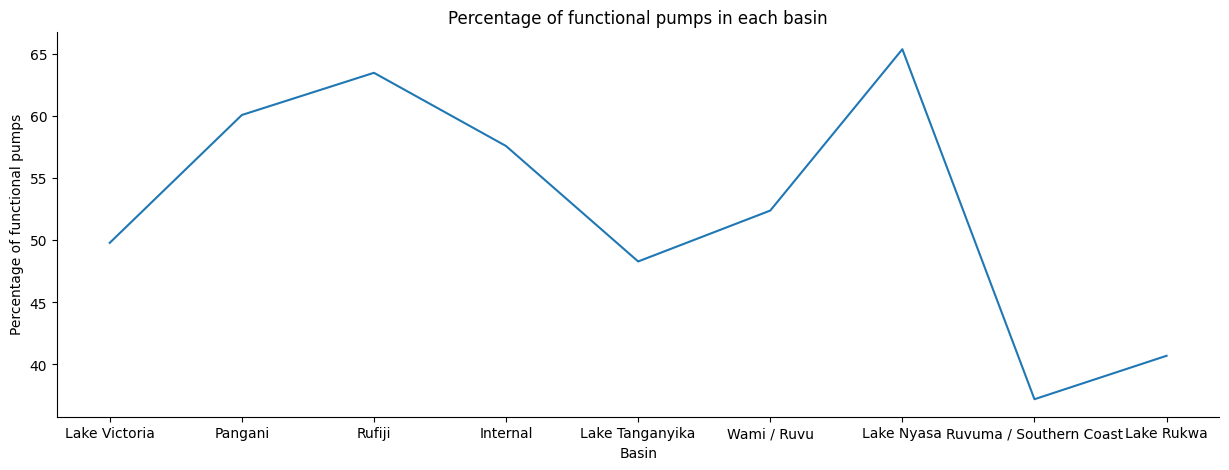

In [55]:
# @title perc_functional

from matplotlib import pyplot as plt
basin['perc_functional'].plot(kind='line', figsize=(15, 5), title='Percentage of functional pumps in each basin')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Percentage of functional pumps')
plt.xlabel('Basin')

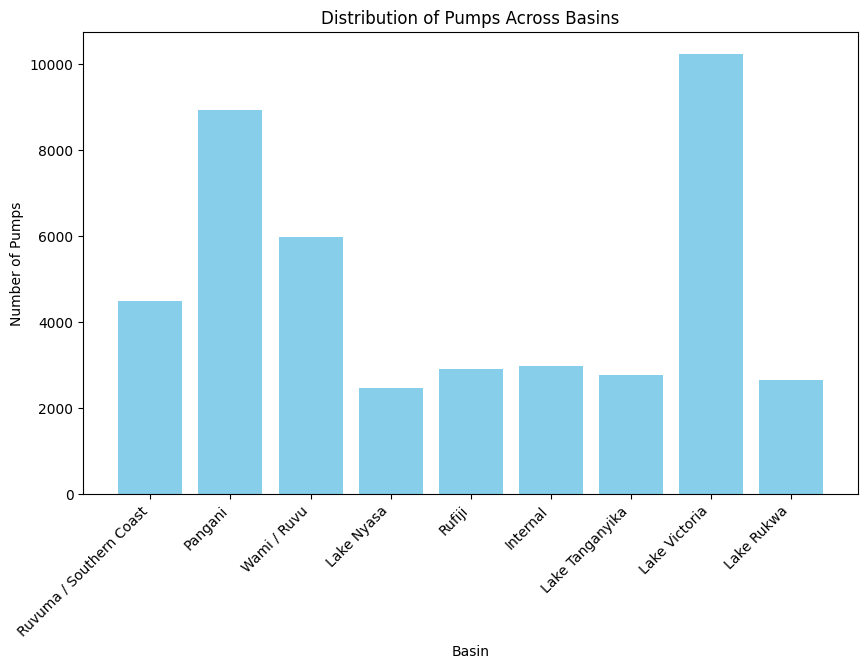

In [56]:
# @title Distribution of Pumps Across Basins

import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({'basin': ['Ruvuma / Southern Coast', 'Pangani', 'Wami / Ruvu', 'Lake Nyasa', 'Rufiji', 'Internal', 'Lake Tanganyika', 'Lake Victoria', 'Lake Rukwa'], 'nr_pumps': [4493, 8940, 5987, 2454, 2893, 2960, 2771, 10248, 2646]})

plt.figure(figsize=(10, 6))
plt.bar(data['basin'], data['nr_pumps'], color='skyblue')
plt.xlabel('Basin')
plt.ylabel('Number of Pumps')
plt.title('Distribution of Pumps Across Basins')
_ = plt.xticks(rotation=45, ha='right')

We can note that the pump distribution seems even across the basins with lake victoria having the majority of the pumps.
However lake Nyasa seems to be the most efficient basin providing the most functional pumps

## Region

In [57]:
categorical_dqr.loc[['region']]

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
region,object,59400,21,0,0.0,Iringa,5294,8.9


In [58]:
region = distribution_checker(raw, 'region')
region = region.sort_values('nr_pumps', ascending= False)
region.head(10)

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
region,,,,,
Iringa,5294.0,8.9,78.2,19.5,2.3
Shinyanga,4982.0,8.4,56.0,31.3,12.7
Mbeya,4639.0,7.8,50.0,39.1,10.9
Kilimanjaro,4379.0,7.4,60.3,32.4,7.4
Morogoro,4006.0,6.7,52.9,39.6,7.5
Arusha,3350.0,5.6,68.5,26.3,5.2
Kagera,3316.0,5.6,52.1,38.8,9.2
Mwanza,3102.0,5.2,48.4,45.7,5.9
Kigoma,2816.0,4.7,48.4,30.2,21.4


## Extraction Type

In [59]:
categorical_dqr.loc[['extraction_type_class']]

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
extraction_type_class,object,59400,7,0,0.0,gravity,26780,45.1


In [60]:
extraction_class = distribution_checker(raw, 'extraction_type_class')
extraction_class = extraction_class.sort_values('nr_pumps', ascending= False)
extraction_class.head(10)

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
extraction_type_class,,,,,
gravity,26780.0,45.1,59.9,30.0,10.1
handpump,16456.0,27.7,63.0,30.9,6.0
other,6430.0,10.8,16.0,80.8,3.2
submersible,6179.0,10.4,53.9,42.0,4.1
motorpump,2987.0,5.0,38.0,57.4,4.6
rope pump,451.0,0.8,65.0,31.3,3.8
wind-powered,117.0,0.2,42.7,51.3,6.0


It can be noted that gravity extraction is the most common extraction type with alot of pumps that need repair
This makes both the handpump and the ropepump more efficient extraction methods

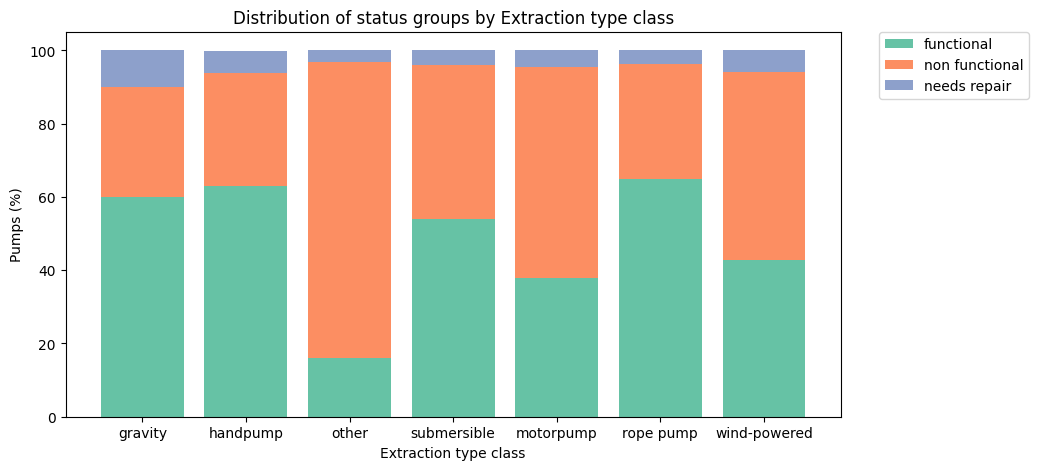

In [61]:
#other pumps  nearly almost disfunctional
fig, ax = plt.subplots(figsize=(10,5))
labels = labels = extraction_class.index
ax.bar(labels, extraction_class['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, extraction_class['perc_non_functional'], label = 'non functional', bottom = extraction_class['perc_functional'] , color = '#fc8e62')
ax.bar(labels, extraction_class['perc_functional_needs_repair'], label = 'needs repair', bottom = extraction_class['perc_functional'] + extraction_class['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by Extraction type class', xlabel = 'Extraction type class', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# **Modelling**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#machine learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import shap

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [63]:
def confusion_matrix_plotter (y_test,y_pred):
  fig, ax = plt.subplots(figsize=(8,5))
  data = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
  ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
  ax.set_xlabel("Predicted")
  ax.set_ylabel ("Actual")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_yticklabels(ax.get_xticklabels(), rotation=0)


In [64]:
def feature_importances (model, title):
  features= X_train.columns
  importances = np.round(model.feature_importances_,3)
  indices = np.argsort(importances)
  num_features = len(features)
  fig, ax = plt.subplots(figsize=(10,10))
  plt.barh(range(num_features), importances[indices[-num_features:]],  align='center', color =  '#66c2a5')
  plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
  plt.xlabel('Relative Importance')
  plt.title('Feature Importance'+ title)
plt.show()

In [65]:
train_labels = pd.read_csv('/content/Training set lables.csv')
train_values = pd.read_csv('/content/Training Set Values.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])
test_values = pd.read_csv('/content/Test Set Values.csv', parse_dates = ['date_recorded' ] , na_values = [0, '0'])


In [66]:
#merge train values and train labels to single dataset
train= pd.merge(train_labels , train_values, on='id')

In [67]:
train.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [68]:
# Create a new DataFrame 'new_df' containing only the 'train' DataFrame's data.
final_df = train.copy()

In [69]:
#define train and test
train_set = final_df [final_df ["id"].isin(train_values["id"])]
test_set =  final_df  [final_df  ["id"].isin(test_values["id"])]

In [70]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()


In [71]:
# Extract year, month, and day from 'date_recorded'
train_set['year_recorded'] = train_set['date_recorded'].dt.year
train_set['month_recorded'] = train_set['date_recorded'].dt.month
train_set['day_recorded'] = train_set['date_recorded'].dt.day

In [72]:
# Drop the original 'date_recorded' column
train_set = train_set.drop('date_recorded', axis=1)

In [73]:
models = [RandomForestClassifier(random_state=42)]

In [74]:
#create empty lists for the accuracy and standard deviation
accuracy=[]
std = []

In [75]:
#define X and y for training the model
X= train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)

In [76]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)


param_grid = { 'n_estimators': [ 150, 175,  200, 225],
             'max_features':['log2', ],
             'max_depth' : [30 , 40, 50, 60, 70],
             'min_samples_split':[6, 7, 8, 9, 10]}


In [77]:
#Create a based model
rf =     RandomForestClassifier( random_state=42, warm_start = True)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_rf .fit(X_train, y_train)

#print best parameters
print('Best Score:', grid_search_rf .best_score_)
print('Parameters:', grid_search_rf .best_params_)
print('Best Model:', grid_search_rf .best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=175; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=175; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=175; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=175; total time=   0.1s
[CV] END max_depth=30, max_features=l

ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 832, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Dh'

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 832, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Rc Church'


In [ ]:
#score model
best_model = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model, " Random forest classifier")